In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
# from utils.PGS_analysis import *
# from PGS_analysis import *
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from os.path import join
import seaborn as sns 

In [11]:
import os
os.getcwd()

'/project/bogdan_shared/sandra/PGS_Contextualization/PRS_contextualization/utils'

In [3]:
# res = pd.read_table("/project/bogdan_shared/sandra/PGS_Contextualization/results/R2_AUC_results.csv", sep='\s+')
res = pd.read_table("/project/bogdan_shared/sandra/PGS_Contextualization/test/R2_AUC_results_Znorm2.csv", sep='\s+')

In [4]:
res.PGS.unique()

,PGS,prs_type,context,context_group,r2,aux
1,BC_eMERGE_Z_norm2,PRS,all,1,2.924916e-02,0.048974
2,BC_eMERGE_Z_norm2,PRS,Age_binned,"(45, 65]",3.007195e-02,0.052067
3,BC_eMERGE_Z_norm2,PRS,Age_binned,"(65, 100]",2.852454e-02,0.054019
4,BC_eMERGE_Z_norm2,PRS,Age_binned,"(18, 45]",1.854071e-02,0.007368
5,BC_eMERGE_Z_norm2,PRS,BMI_binned,"(24.9, 30.0]",3.512841e-02,0.064254
...,...,...,...,...,...,...
66,CHD_PGS003725_Z_norm2,PRS,ancestry,EAS,1.346705e-01,0.021170
67,CHD_PGS003725_Z_norm2,PRS,ancestry,AMR,6.562892e-02,0.031336
68,CHD_PGS003725_Z_norm2,PRS,ancestry,SAS,5.409077e-02,0.007091
69,CHD_PGS003725_Z_norm2,PRS,ancestry,UNKNOWN1,1.486419e+09,0.000000


In [6]:
res[res.PGS == 'BC_PGS000507_Z_norm2']

,PGS,prs_type,context,context_group,r2,aux
18,BC_PGS000507_Z_norm2,PRS,all,1,4.011153e-02,0.061852
19,BC_PGS000507_Z_norm2,PRS,Age_binned,"(45, 65]",4.145984e-02,0.065452
20,BC_PGS000507_Z_norm2,PRS,Age_binned,"(65, 100]",4.350864e-02,0.076096
21,BC_PGS000507_Z_norm2,PRS,Age_binned,"(18, 45]",2.097463e-02,0.009547
22,BC_PGS000507_Z_norm2,PRS,BMI_binned,"(24.9, 30.0]",5.301116e-02,0.086579
23,BC_PGS000507_Z_norm2,PRS,BMI_binned,"(30.0, 50.0]",2.801990e-02,0.037758
24,BC_PGS000507_Z_norm2,PRS,BMI_binned,"(18.5, 24.9]",4.491793e-02,0.068232
25,BC_PGS000507_Z_norm2,PRS,BMI_binned,"(0.0, 18.5]",5.729801e-02,0.038971
26,BC_PGS000507_Z_norm2,PRS,self_identified_sex,Female,4.011153e-02,0.061852
27,BC_PGS000507_Z_norm2,PRS,ancestry,EUR,4.879932e-02,0.090854


In [10]:
order= {'Age_binned':['baseline', '(18, 45]', '(45, 65]', '(65, 100]'],
       'BMI_binned':['baseline', '(0.0, 18.5]','(18.5, 24.9]','(24.9, 30.0]', '(30.0, 50.0]'],
       'ancestry':['baseline',"EUR", 'AFR', 'AMR', 'EAS', 'SAS'],
       'self_identified_sex':['baseline','Female', 'Male',]}
# PGS = ['BC_eMERGE', 'BC_PGS000507', 'CHD_eMERGE', 'CHD_PGS003725']
PGS = ['BC_eMERGE_Z_norm2', 'BC_PGS000507_Z_norm2', 'CHD_eMERGE_Z_norm2', 'CHD_PGS003725_Z_norm2']

## breast cancer

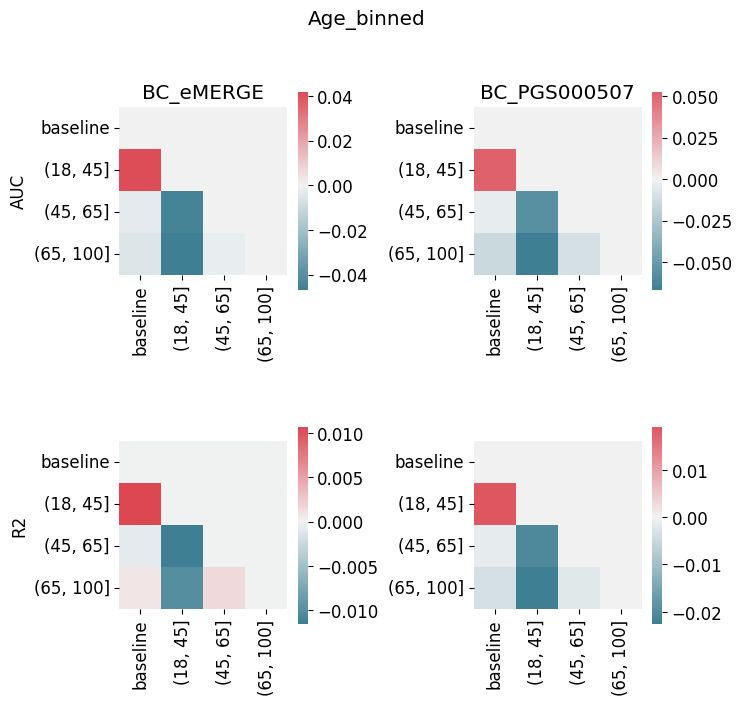

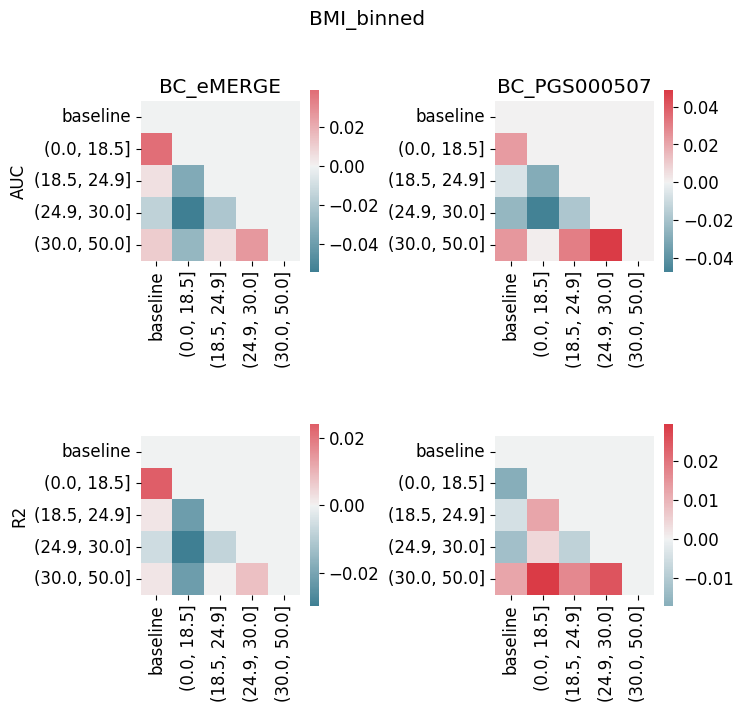

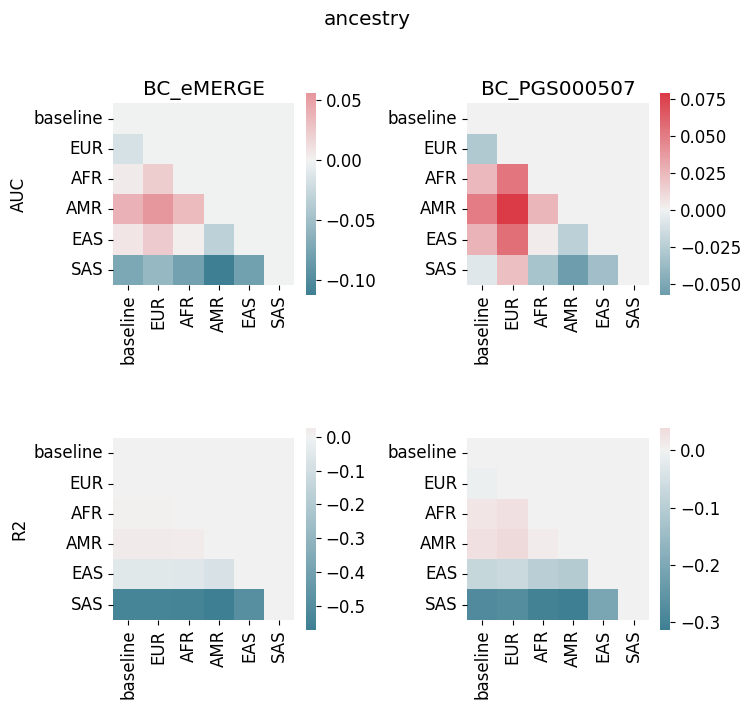

In [12]:
import matplotlib.pyplot as plt

rcParams.update({'font.size':12})
# prs='PRS_PC'   
prs='PRS'  
contexts = ['Age_binned',
            'BMI_binned' ,
            'ancestry']
for cont in contexts:
    fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))
    for i, pgs in enumerate(PGS):
        if not pgs.startswith('BC'):
            continue
        baseline = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context=='all')]
        aux = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context==cont)]
        aux = pd.concat([baseline, aux])
        aux.loc[aux.context_group=='1', 'context_group'] = 'baseline'
        aux.set_index(aux.context_group, drop=False,inplace=True)
        aux = aux.loc[order[cont]]
            
        r2_diff = []
        AUC_diff  = []
        for r1 in range(aux.shape[0]):
            aux_r2 = []
            aux_AUC = []
            for r2 in range(aux.shape[0]):
                aux_r2.append((aux.r2.iloc[r1]-aux.r2.iloc[r2]))#/baseline.r2.iloc[0])
                aux_AUC.append((aux.aux.iloc[r1]-aux.aux.iloc[r2]))#/baseline.aux.iloc[0])
            r2_diff.append(aux_r2)
            AUC_diff.append(aux_AUC)
        A = np.tril(np.array(AUC_diff).T)
        sns.heatmap(A, ax=ax[0, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, square=True,
                    cbar_kws={'shrink': 0.7})

        ax[0, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[0, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
        ax[0, i].set_title("_".join(pgs.split('_')[:2]) )

        A = np.tril(np.array(r2_diff).T)
        sns.heatmap(A, ax=ax[1, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                    center=0, square=True,
                    cbar_kws={'shrink': 0.7}) 

        ax[1, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[1, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
    ax[0,0].set_ylabel('AUC')
    ax[1, 0].set_ylabel('R2')
    plt.suptitle(cont)
    plt.tight_layout()
    plt.show()
                    

## Coronary heart disease

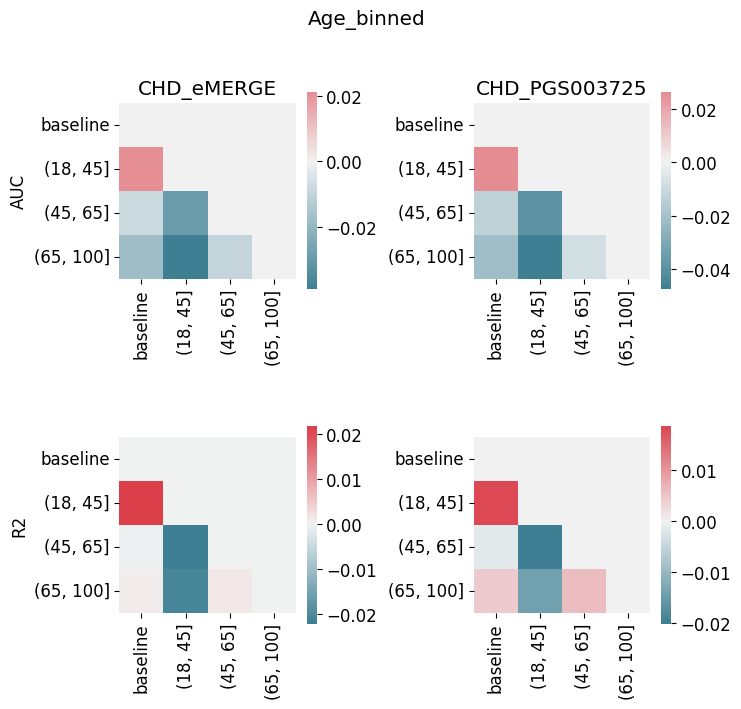

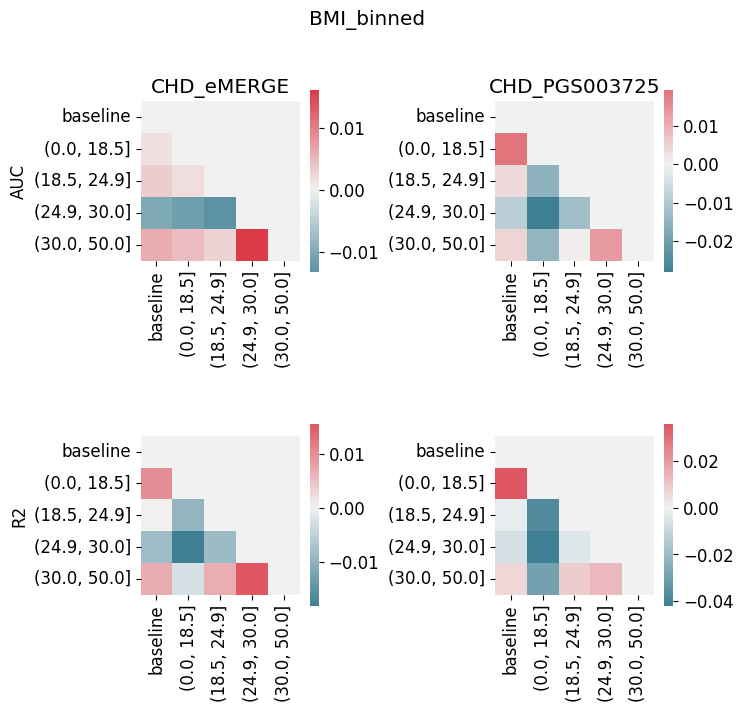

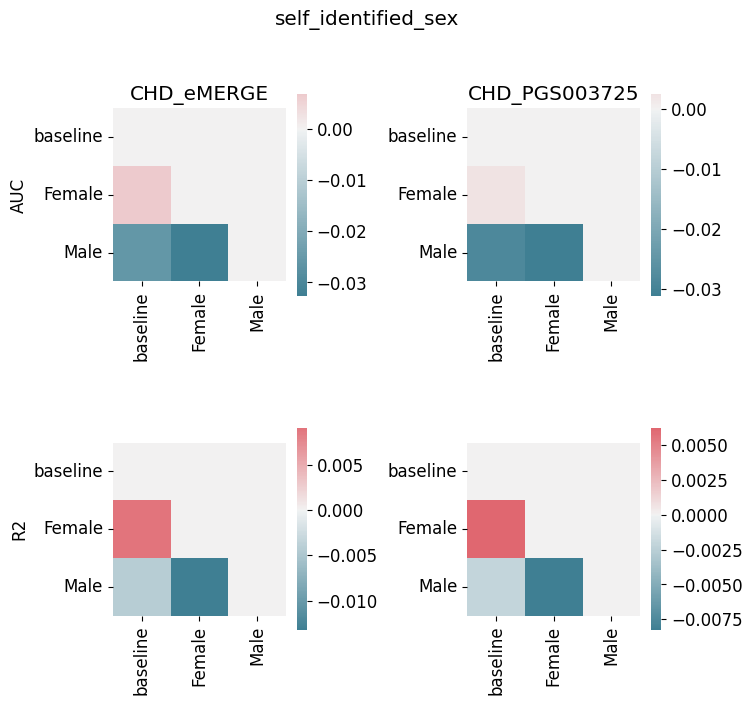

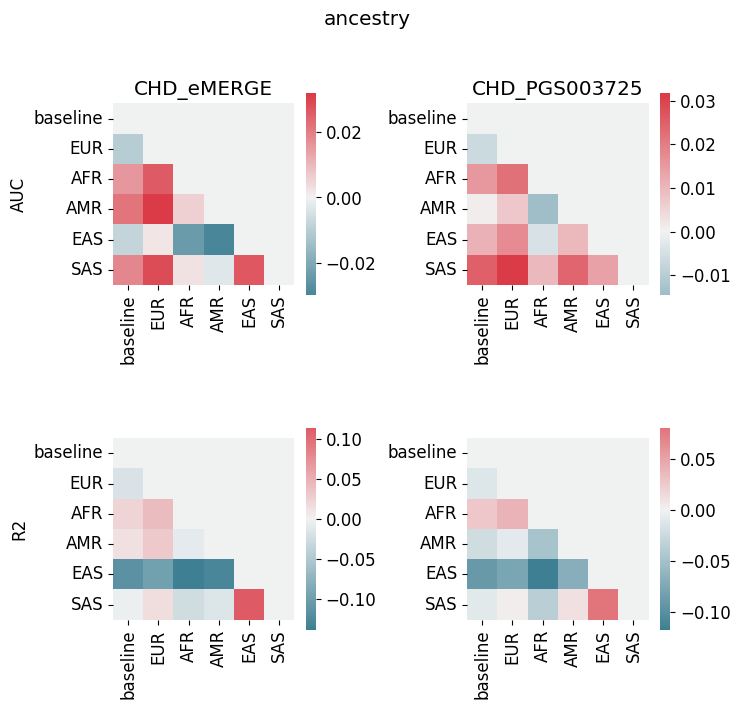

In [13]:
# prs='PRS_PC'   
prs='PRS'   
contexts = ['Age_binned',
            'BMI_binned' ,
            'self_identified_sex',
            'ancestry']
for cont in contexts:

    fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))
    for i, pgs in enumerate(PGS[2:]):

        baseline = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context=='all')]
        aux = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context==cont)]
        aux = pd.concat([baseline, aux])
        aux.loc[aux.context_group=='1', 'context_group'] = 'baseline'
        aux.set_index(aux.context_group, drop=False,inplace=True)
        aux = aux.loc[order[cont]]
            
        r2_diff = []
        AUC_diff  = []
        for r1 in range(aux.shape[0]):
            aux_r2 = []
            aux_AUC = []
            for r2 in range(aux.shape[0]):
                aux_r2.append((aux.r2.iloc[r1]-aux.r2.iloc[r2]))#/baseline.r2.iloc[0])
                aux_AUC.append((aux.aux.iloc[r1]-aux.aux.iloc[r2]))#/baseline.aux.iloc[0])
            r2_diff.append(aux_r2)
            AUC_diff.append(aux_AUC)
        A = np.tril(np.array(AUC_diff).T)
        sns.heatmap(A, ax=ax[0, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, square=True,
                    cbar_kws={'shrink': 0.7})

        ax[0, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[0, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
        ax[0, i].set_title("_".join(pgs.split('_')[:2]) )

        A = np.tril(np.array(r2_diff).T)
        sns.heatmap(A, ax=ax[1, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                    center=0, square=True,
                    cbar_kws={'shrink': 0.7}) 

        ax[1, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[1, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
    ax[0,0].set_ylabel('AUC')
    ax[1, 0].set_ylabel('R2')
    plt.suptitle(cont)
    plt.tight_layout()
    plt.show()
                    